# **Neural Networks**
part 3: RMSProp & Momentum improvements to Gradient Descent

### **Changes**
- added RMSProp and Momentum training methods 
- random_state can be set at network initialization, otherwise no seed is set
- new functionality: stop training at a desired loss value

### **Imports**

In [56]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from network.mlp import MLP
from metrics.metrics import mse
from tabulate import tabulate

In [57]:
square_large_train = pd.read_csv("./data/regression/square-large-training.csv")
square_large_test = pd.read_csv("./data/regression/square-large-test.csv")

In [58]:
steps_large_train = pd.read_csv("./data/regression/steps-large-training.csv")
steps_large_test = pd.read_csv("./data/regression/steps-large-test.csv")

In [59]:
multimodal_large_train = pd.read_csv("./data/regression/multimodal-large-training.csv")
multimodal_large_test = pd.read_csv("./data/regression/multimodal-large-test.csv")

### **Functions for analysis purposes**

In [ ]:
def compare_rmsprop_momentum(neurons_hidden: list, hidden_activation: str, output_activation: str,
                             hidden_init: str, output_init: str, loss_value_to_achieve: float, 
                             epochs: int, beta: float, weights_decay: float, learning_rate_rmsprop: float,
                             learning_rate_momentum: float,
                             x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray):
    
    layers = []
    
    for i in range(len(neurons_hidden)):
        layers.append({
            "output_size" : neurons_hidden[i],
            "activation" : hidden_activation,
            "init" : hidden_init
        })
    
    layers.append({"output_size" : 1, "activation" : output_activation, "init" : output_init})
        
    mlp_rmsprop = MLP(layers_init=layers,
                      input=x_train,
                      random_state=42)
    
    mlp_momentum = MLP(layers_init=layers,
                      input=x_train,
                      random_state=42)
    print("----- RMSProp -----")
    t0 = time.time()
    mlp_rmsprop.train(X_train=x_train,
                      Y_train=y_train,
                      epochs=epochs,
                      stop_loss=loss_value_to_achieve,
                      method="rmsprop",
                      learning_rate=learning_rate_rmsprop,
                      beta=beta
                      )
    t1 = time.time()
    mlp_rmsprop_training_history = mlp_rmsprop.get_training_history()
    
    print("----- Momentum -----")
    
    t2 = time.time()
    mlp_momentum.train(X_train=x_train,
                       Y_train=y_train,
                       epochs=epochs,
                       stop_loss=loss_value_to_achieve,
                       method="momentum",
                       learning_rate=learning_rate_momentum,
                       weights_decay=weights_decay
                       )
    t3 = time.time()
    mlp_momentum_training_history = mlp_momentum.get_training_history()

    y_pred_rmsprop = mlp_rmsprop.forward(x_test)
    y_pred_momentum = mlp_momentum.forward(x_test)

    mse_rmsprop = mse(y_test, y_pred_rmsprop)
    mse_momentum = mse(y_test, y_pred_momentum)

    table = [
        ["Method", "Training Time (s)", "Number of Epochs", "MSE (test)", "MSE (train)"],
        ["RMSProp", f"{t1 - t0:.3f}", len(mlp_rmsprop_training_history['losses']), f"{mse_rmsprop:.4f}", f"{mlp_rmsprop_training_history['losses'][-1]:.4f}"],
        ["Momentum", f"{t3 - t2:.3f}", len(mlp_momentum_training_history['losses']), f"{mse_momentum:.4f}", f"{mlp_momentum_training_history['losses'][-1]:.4f}"]
    ]

    print(tabulate(table, headers="firstrow", tablefmt="grid"))

    plt.figure(figsize=(10,6))
    plt.plot(range(len(mlp_rmsprop_training_history['losses'])), mlp_rmsprop_training_history['losses'], label='RMSProp')
    plt.plot(range(len(mlp_momentum_training_history['losses'])), mlp_momentum_training_history['losses'], label='Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.show()

    print("----- RMSProp prediction -----")
    mlp_rmsprop.visualize_prediction(x_test, y_test)
    print("----- Momentum Prediction -----")
    mlp_momentum.visualize_prediction(x_test, y_test)

def plot_train_test_set(train_df: pd.DataFrame,
                        test_df: pd.DataFrame):
    plt.figure(figsize=(10,6))
    plt.scatter(train_df[["x"]], train_df[["y"]], label="train", color="blue")
    plt.scatter(test_df[["x"]], test_df[["y"]], label="test", color="orange", alpha=0.2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"train vs. test dataset")
    plt.legend()

### **Dataset: Square Large**

----- RMSProp -----
Epoch: 0; loss: 9635.3231
Epoch: 2500; loss: 2.1291
Epoch: 5000; loss: 1.3630
Epoch: 7500; loss: 1.2231
Epoch: 10000; loss: 1.1648
Epoch: 12500; loss: 1.1139
Epoch: 15000; loss: 1.0897
Epoch: 17500; loss: 1.0700
Epoch: 20000; loss: 1.0511
Epoch: 22500; loss: 1.0329
Epoch: 25000; loss: 1.0187
Epoch: 27500; loss: 1.0067
Epoch: 30000; loss: 0.9953
Epoch: 32500; loss: 0.9843
Epoch: 35000; loss: 0.9740
Epoch: 37500; loss: 0.9644
Epoch: 40000; loss: 0.9553
Epoch: 42500; loss: 0.9467
Epoch: 45000; loss: 0.9384
Epoch: 47500; loss: 0.9301
Final epoch: 49999; loss: 0.9199


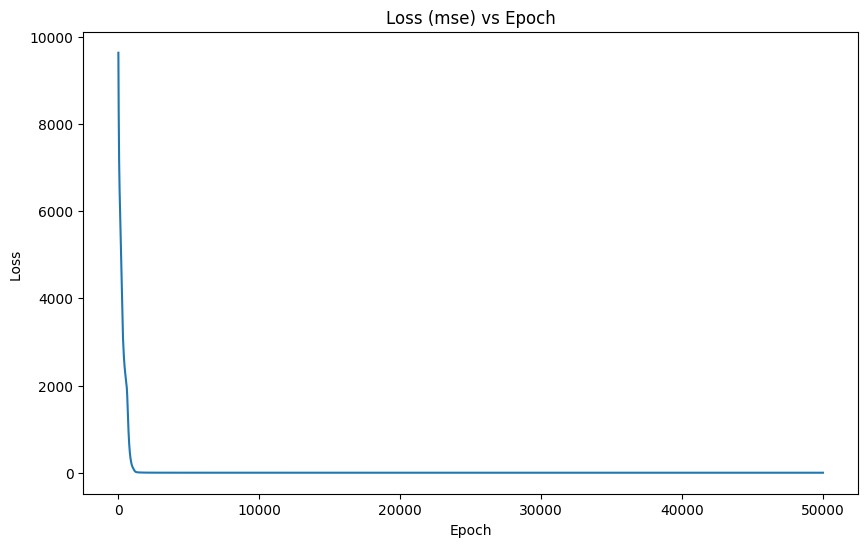

----- Momentum -----
Epoch: 0; loss: 9503.2880
Epoch: 2500; loss: 0.1354
Epoch: 5000; loss: 0.0500
Epoch: 7500; loss: 0.0302
Epoch: 10000; loss: 0.0216
Epoch: 12500; loss: 0.0166
Epoch: 15000; loss: 0.0132
Epoch: 17500; loss: 0.0109
Final epoch: 18634; loss: 0.0100


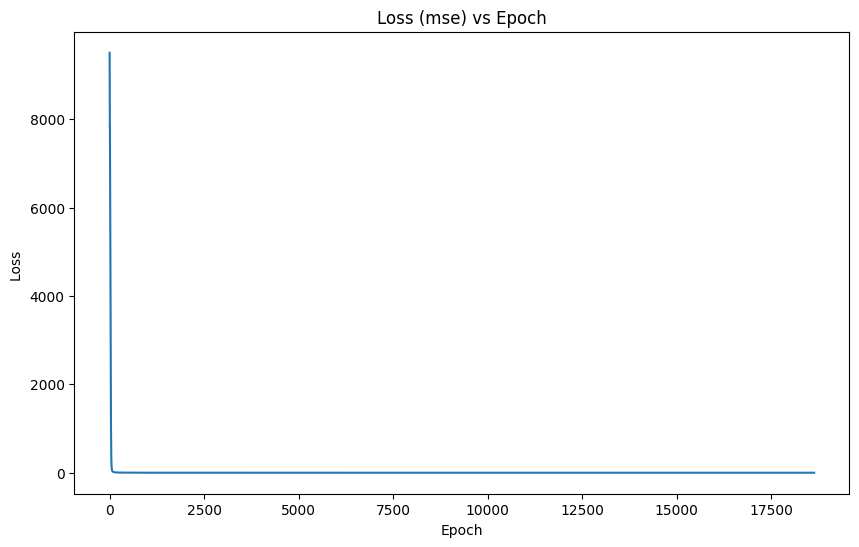

+----------+---------------------+--------------------+--------------+---------------+
| Method   |   Training Time (s) |   Number of Epochs |   MSE (test) |   MSE (train) |
+==========+=====================+====================+==============+===============+
| RMSProp  |              36.735 |              50000 |      470.718 |        0.9199 |
+----------+---------------------+--------------------+--------------+---------------+
| Momentum |              13.49  |              18635 |      385.479 |        0.01   |
+----------+---------------------+--------------------+--------------+---------------+


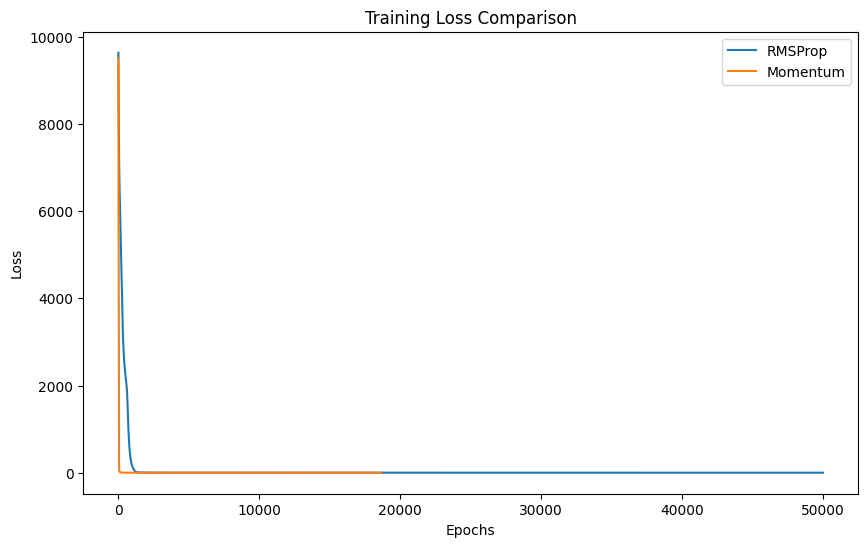

----- RMSProp prediction -----


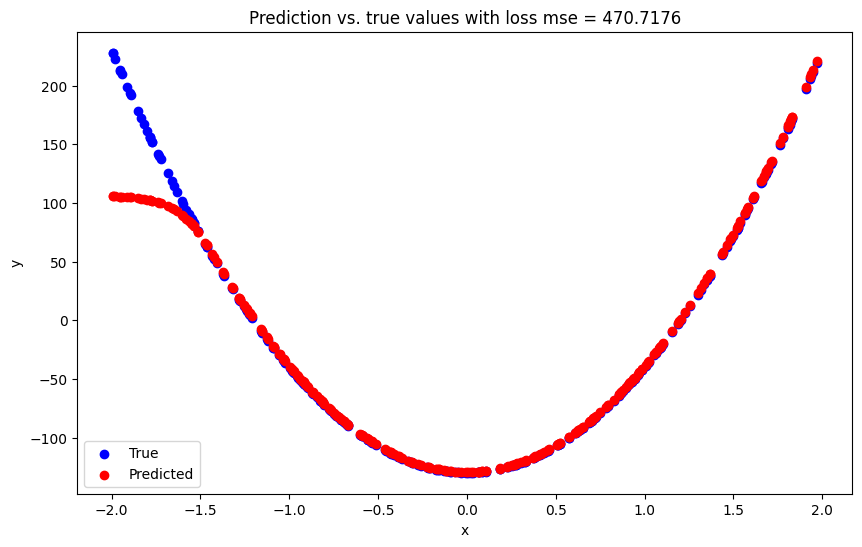

Loss mse = 470.717640382126.
----- Momentum Prediction -----


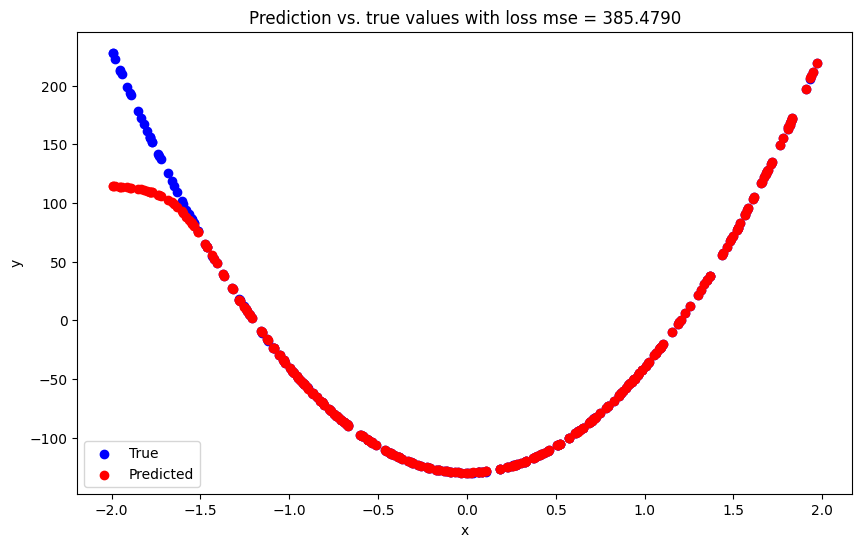

Loss mse = 385.4790399345375.


In [54]:
compare_rmsprop_momentum(neurons_hidden=[50],
                         hidden_activation="sigmoid",
                         output_activation="identity",
                         hidden_init="xavier_normal",
                         output_init="xavier_normal",
                         loss_value_to_achieve=0.01,
                         epochs=50_000,
                         beta=0.9,
                         weights_decay=0.9,
                         learning_rate_rmsprop=0.023, # 0.025
                         learning_rate_momentum=0.01,
                         x_train=square_large_train[["x"]].to_numpy(),
                         y_train=square_large_train[["y"]].to_numpy(),
                         x_test=square_large_test[["x"]].to_numpy(),
                         y_test=square_large_test[["y"]].to_numpy()
                         )

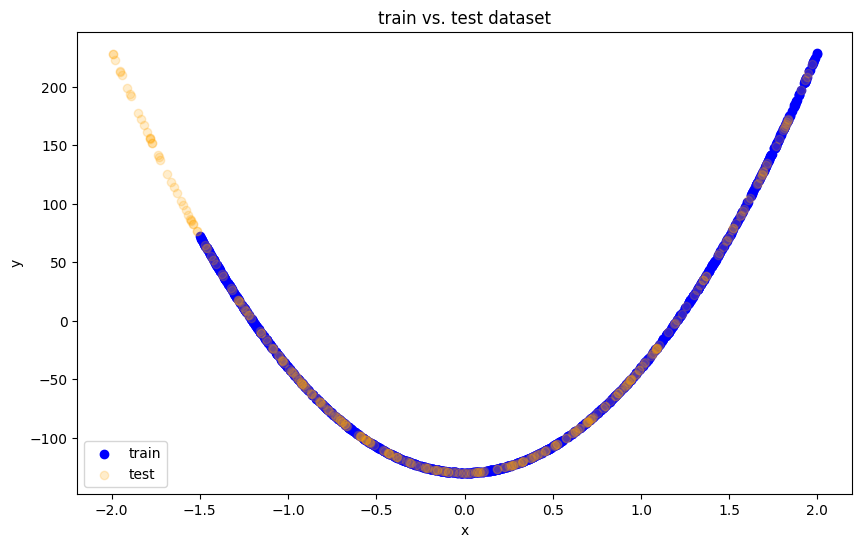

In [8]:
plot_train_test_set(square_large_train, square_large_test)

The reason why the MSE on test set is so high might be that the training set does not include x values ranging from -2.0 to -1.5. Therefore the network could not learn the curve behaviour there.

I have tried with 2500 neurons and 50 000 epochs (and various learning rates) and as a result the left problematic curvature moved slightly up, decreasing the MSE to 37. However it is not 1. To reach MSE ~1, it would require way more compicated architecture as well as hours of training.

---

### **Dataset: Steps Large**

----- RMSProp -----
Epoch: 0; loss: 7289.0125
Epoch: 2500; loss: 54.1306
Epoch: 5000; loss: 35.4974
Epoch: 7500; loss: 27.8013
Epoch: 10000; loss: 23.8440
Epoch: 12500; loss: 21.0326
Epoch: 15000; loss: 19.1837
Epoch: 17500; loss: 17.8175
Epoch: 20000; loss: 16.7031
Epoch: 22500; loss: 15.8237
Epoch: 25000; loss: 15.0804
Epoch: 27500; loss: 14.4413
Epoch: 30000; loss: 13.9001
Epoch: 32500; loss: 13.4139
Epoch: 35000; loss: 12.9501
Epoch: 37500; loss: 12.5409
Epoch: 40000; loss: 12.1843
Epoch: 42500; loss: 11.8986
Epoch: 45000; loss: 11.6388
Epoch: 47500; loss: 11.3618
Final epoch: 49999; loss: 11.3857


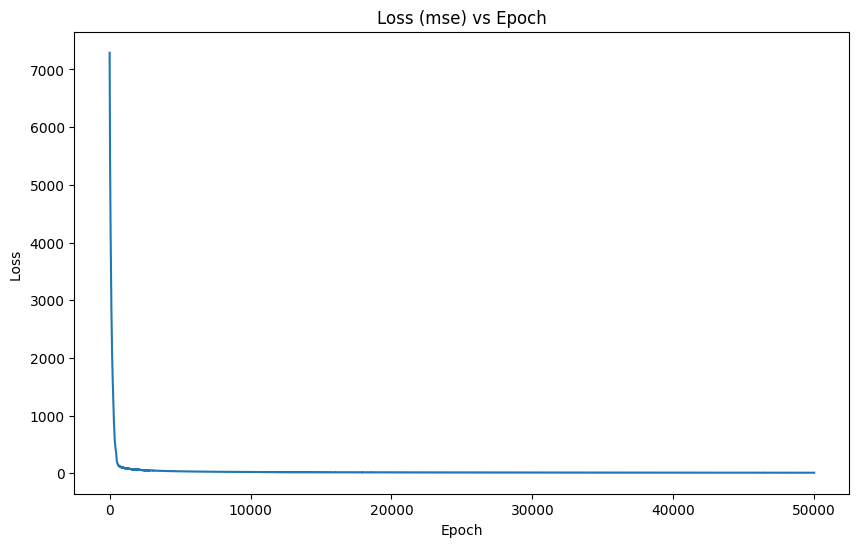

----- Momentum -----
Epoch: 0; loss: 7297.8861
Epoch: 2500; loss: 10.4276
Epoch: 5000; loss: 7.2257
Epoch: 7500; loss: 5.7628
Epoch: 10000; loss: 4.9432
Epoch: 12500; loss: 4.3950
Epoch: 15000; loss: 4.0185
Epoch: 17500; loss: 3.7418
Epoch: 20000; loss: 3.5257
Epoch: 22500; loss: 3.3423
Epoch: 25000; loss: 3.1892
Epoch: 27500; loss: 3.0623
Final epoch: 29110; loss: 2.9900


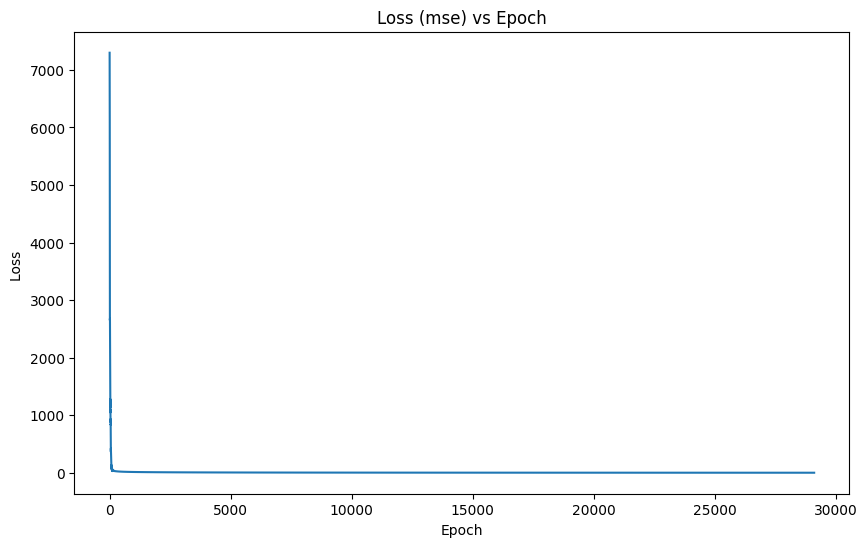

+----------+---------------------+--------------------+--------------+---------------+
| Method   |   Training Time (s) |   Number of Epochs |   MSE (test) |   MSE (train) |
+==========+=====================+====================+==============+===============+
| RMSProp  |             332.589 |              50000 |       9.5237 |       11.3857 |
+----------+---------------------+--------------------+--------------+---------------+
| Momentum |             188.335 |              29111 |       2.5247 |        2.99   |
+----------+---------------------+--------------------+--------------+---------------+


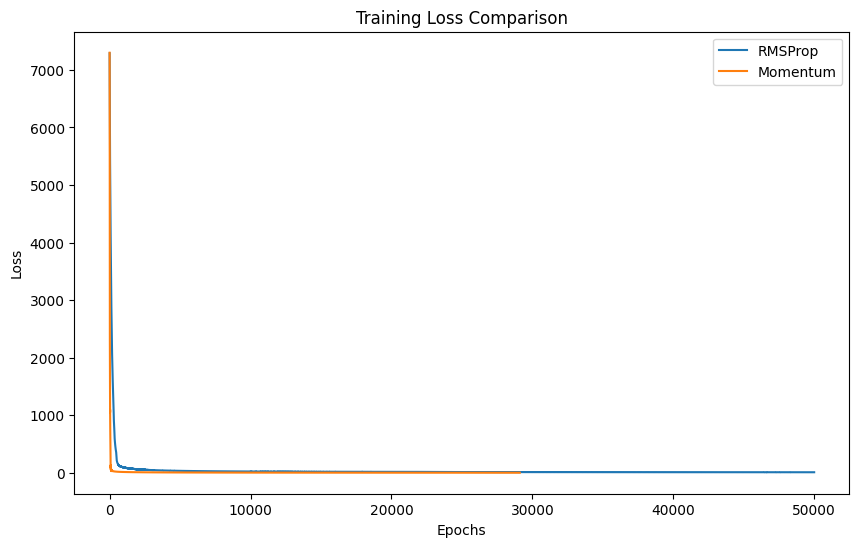

----- RMSProp prediction -----


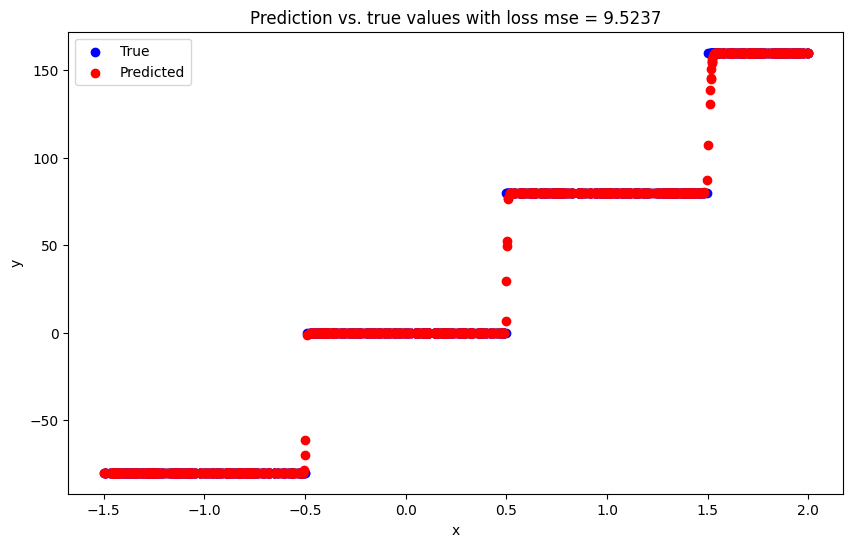

Loss mse = 9.52369329425609.
----- Momentum Prediction -----


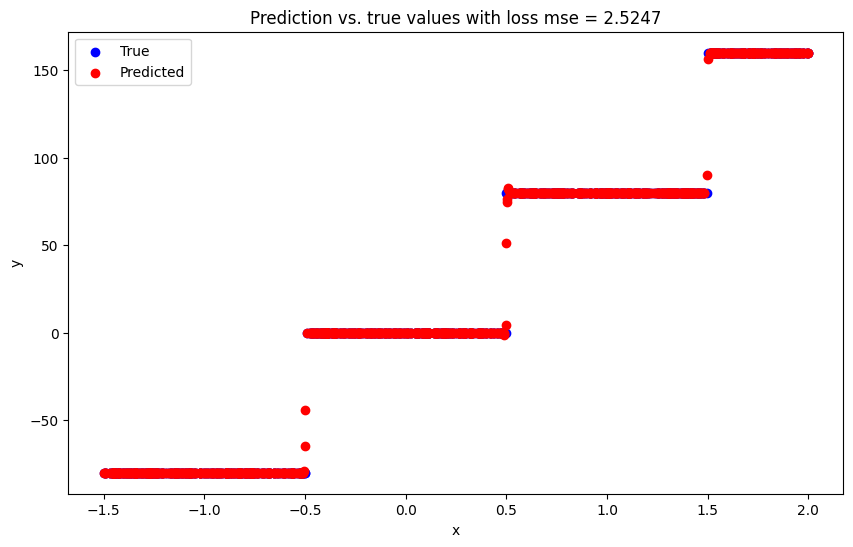

Loss mse = 2.524685524916982.


In [ ]:
compare_rmsprop_momentum(neurons_hidden=[15,15],
                         hidden_activation="sigmoid",
                         output_activation="identity",
                         hidden_init="xavier_normal",
                         output_init="xavier_normal",
                         loss_value_to_achieve=2.99,
                         epochs=50_000, 
                         beta=0.9,
                         weights_decay=0.9,
                         learning_rate_rmsprop=0.035, # 0.03
                         learning_rate_momentum=0.015,
                         x_train=steps_large_train[["x"]].to_numpy(),
                         y_train=steps_large_train[["y"]].to_numpy(),
                         x_test=steps_large_test[["x"]].to_numpy(),
                         y_test=steps_large_test[["y"]].to_numpy()
                         )


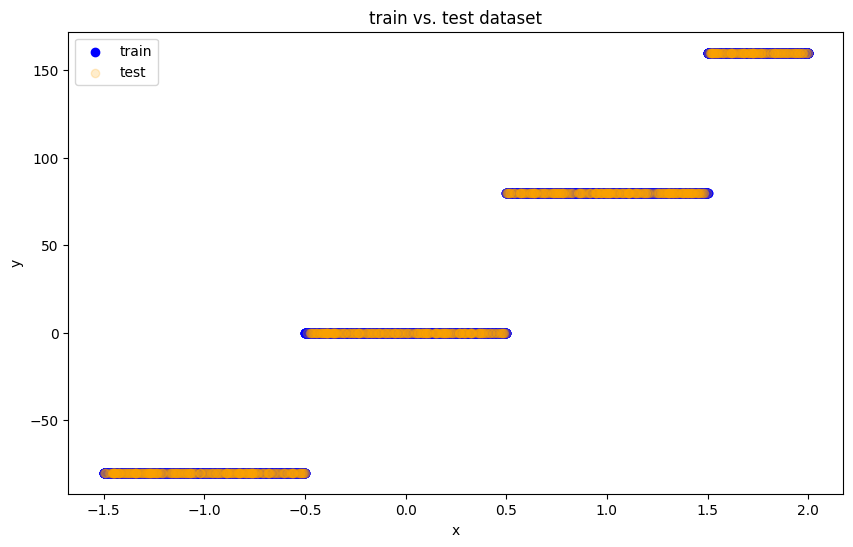

In [10]:
plot_train_test_set(steps_large_train, steps_large_test)

Conclusion: RMSProp reaches the best MSE value with learning rate 0.035. With 0.033 the convergence is slower (stoping at MSE = ~14) and with 0.037 land in local minima. Modifications like 0.0355 have not improved it.

### **Dataset: Multimodal Large**

----- RMSProp -----
Epoch: 0; loss: 5566.1312
Epoch: 2500; loss: 120.9315
Epoch: 5000; loss: 62.5382
Epoch: 7500; loss: 52.1596
Epoch: 10000; loss: 47.4283
Epoch: 12500; loss: 43.2587
Epoch: 15000; loss: 39.9137
Epoch: 17500; loss: 37.9974
Epoch: 20000; loss: 35.8315
Epoch: 22500; loss: 34.1456
Epoch: 25000; loss: 32.4705
Epoch: 27500; loss: 31.3626
Epoch: 30000; loss: 29.3286
Epoch: 32500; loss: 28.8020
Epoch: 35000; loss: 27.4409
Epoch: 37500; loss: 26.3277
Epoch: 40000; loss: 25.7253
Epoch: 42500; loss: 24.7588
Epoch: 45000; loss: 24.1423
Epoch: 47500; loss: 23.5056
Final epoch: 49999; loss: 22.7107


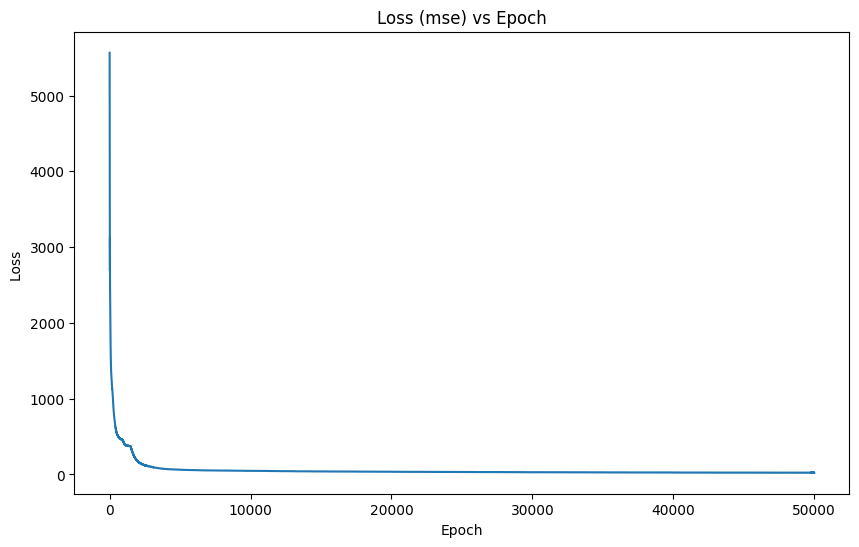

----- Momentum -----
Epoch: 0; loss: 5263.3725
Epoch: 2500; loss: 15.7517
Final epoch: 4398; loss: 8.9887


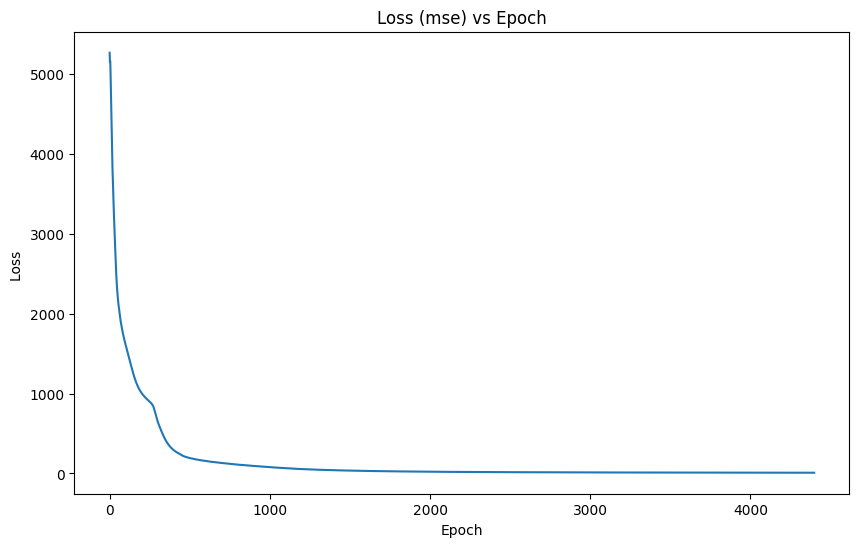

+----------+---------------------+--------------------+--------------+---------------+
| Method   |   Training Time (s) |   Number of Epochs |   MSE (test) |   MSE (train) |
+==========+=====================+====================+==============+===============+
| RMSProp  |             1021.91 |              50000 |      22.373  |       22.7107 |
+----------+---------------------+--------------------+--------------+---------------+
| Momentum |               90.72 |               4399 |       4.9651 |        8.9887 |
+----------+---------------------+--------------------+--------------+---------------+


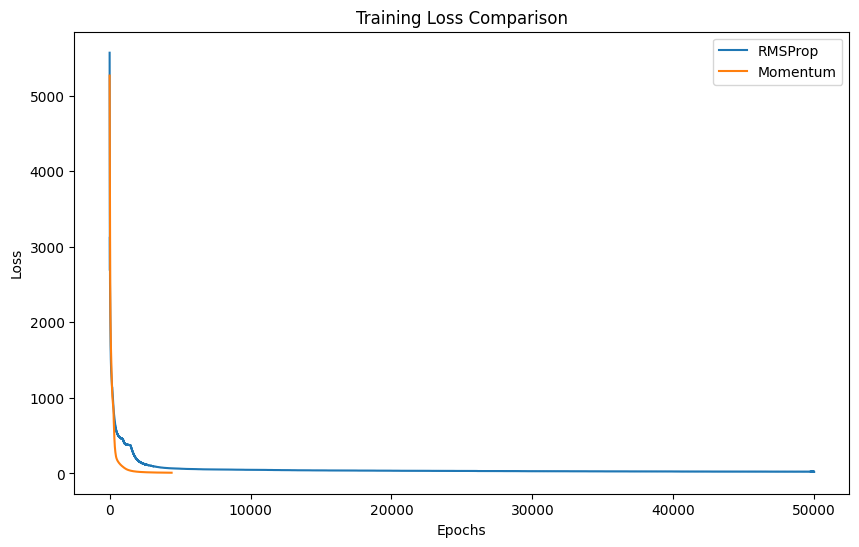

----- RMSProp prediction -----


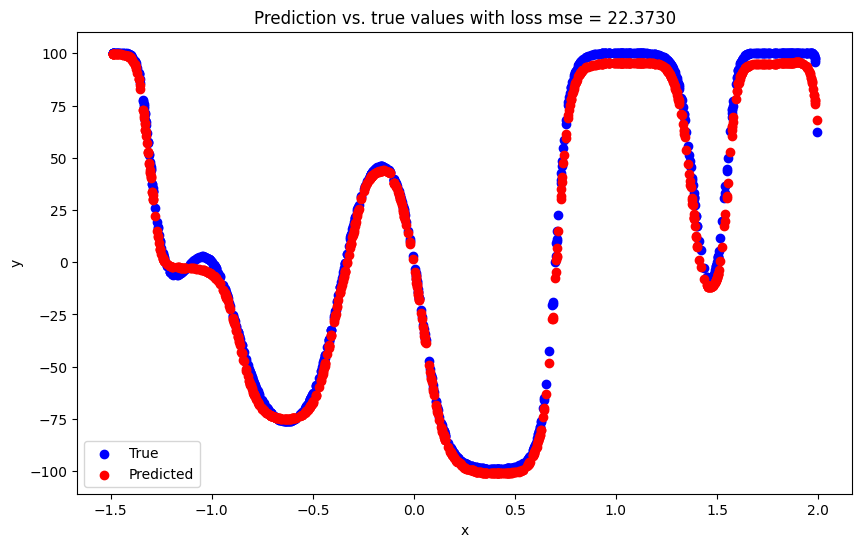

Loss mse = 22.372967375055715.
----- Momentum Prediction -----


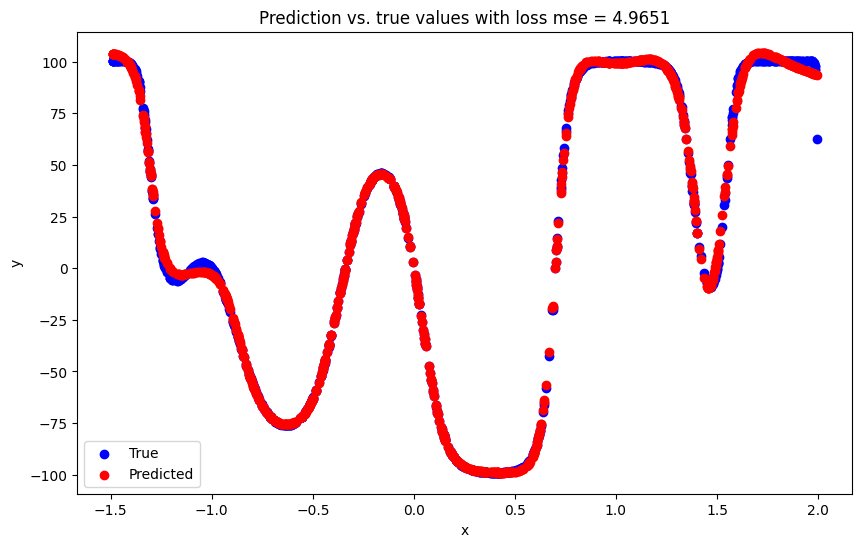

Loss mse = 4.965086626830533.


In [ ]:
compare_rmsprop_momentum(neurons_hidden = [100],
                         hidden_activation="sigmoid",
                         output_activation="identity",
                         hidden_init="xavier_normal",
                         output_init="xavier_normal",
                         loss_value_to_achieve=8.99,
                         epochs=50_000,
                         beta=0.9,
                         weights_decay=0.9,
                         learning_rate_rmsprop=0.2, 
                         learning_rate_momentum=0.01,
                         x_train=multimodal_large_train[["x"]].to_numpy(),
                         y_train=multimodal_large_train[["y"]].to_numpy(),
                         x_test=multimodal_large_test[["x"]].to_numpy(),
                         y_test=multimodal_large_test[["y"]].to_numpy()
                         )

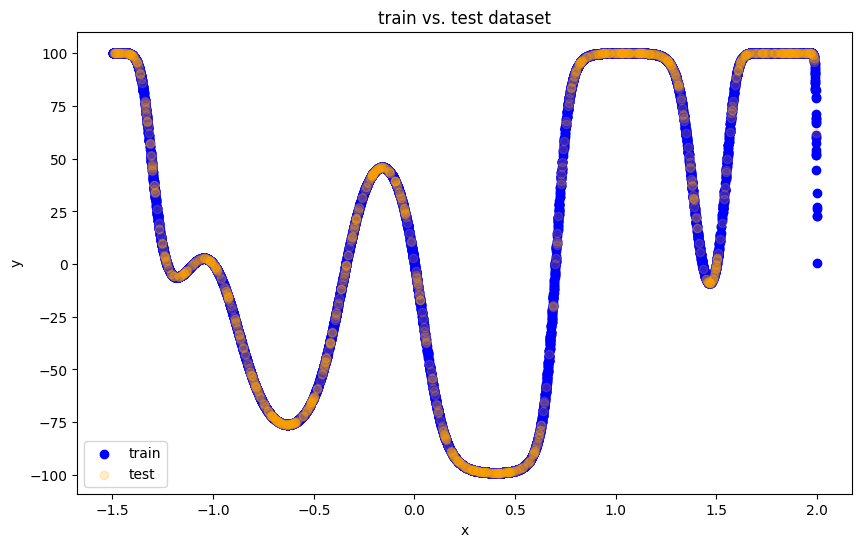

In [55]:
plot_train_test_set(multimodal_large_train, multimodal_large_test)

Similarily to previous example, RMSProp's results are the best I could reach and slight cheanges to the learning rate did not improve it.

Those are the best results. I hope that is enough.